#Data Generator

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
import pandas as pd
import os

The discrete time step, masses of bodies, and gravitational constant are fixed for all data points

In [2]:
step = 0.001
max_t = 5
M = [1,1,1]
G = 1

This function calculates the acceleration of each of the three bodies in the current time step

In [3]:
def compute_acceleration(x,y,M,ax,ay,G):
    for j in range(3):

        dx = np.array(x[j] - x).transpose()
        dy = np.array(y[j] - y).transpose()

        d = np.power(np.sqrt( np.power(dx,2) + np.power(dy,2)),3)
        
        for k in range(3):
            if d[k] == 0:
                ax[k,j] = 0
                ay[k,j] = 0
            else:
                ax[k,j] = -dx[k]*M[k]*G / d[k]
                ay[k,j] = -dy[k]*M[k]*G / d[k]

        ax_tot = np.sum(ax, axis=0)
        ay_tot = np.sum(ay, axis=0)

    return ax_tot, ay_tot

This function is used to calculate the trajectories of the three bodies for the whole duration of the simulation

In [4]:
def verlet_method(max_t = 5, step = 0.001, M = [1,1,1], G = 1, x1 = 0, y1 = 0, vx1 = 0, vy1 = 0, x2 = 0, y2 = 0, vx2 = 0, vy2 = 0, x3 = 0, y3 = 0, vx3 = 0, vy3 = 0):
    t = np.arange(0,max_t,step)
    
    x = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    y = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    vx = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    vy = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    ax = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')
    ay = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')

    x[0][0] = x1
    x[0][1] = x2
    x[0][2] = x3 

    y[0][0] = y1
    y[0][1] = y2
    y[0][2] = y3

    vx[0][0] = vx1
    vx[0][1] = vx2
    vx[0][2] = vx3 

    vy[0][0] = vy1
    vy[0][1] = vy2
    vy[0][2] = vy3 

    for i in range(len(t)-1):
        ax_tot, ay_tot = compute_acceleration(x[i], y[i], M, ax, ay, G)

        x[i+1] = x[i] + step*vx[i] + (ax_tot * step * step)/2
        y[i+1] = y[i] + step*vy[i] + (ay_tot * step * step)/2

        ax_tot_next, ay_tot_next = compute_acceleration(x[i+1], y[i+1], M, ax, ay, G)

        vx[i+1] = vx[i] + step * (ax_tot + ax_tot_next) / 2
        vy[i+1] = vy[i] + step * (ay_tot + ay_tot_next) / 2

    return x, y, vx, vy

This function nicely plots the resulting trajectories

In [75]:
def plot(x,y):
    Body1, = plt.plot(x[:,0], y[:,0], color = 'green')
    Body2, = plt.plot(x[:,1], y[:,1], color = 'blue')
    Body3, = plt.plot(x[:,2], y[:,2], color = 'red')
    plt.scatter(x[0][0], y[0][0], color = 'green')
    plt.scatter(x[0][1], y[0][1], color = 'blue')
    plt.scatter(x[0][2], y[0][2], color = 'red')
    plt.grid()
    plt.xlim(np.amin(x) - 0.2, np.amax(x) + 0.2)
    plt.ylim(np.amin(y) - 0.2, np.amax(y) + 0.2)

    plt.title("2D TBP for " + str(len(x)) + " time steps using multi layer perceptron")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend([Body1, Body2, Body3],['Body 1','Body 2','Body 3'])
    plt.savefig("bad-example.png")
    plt.show()

The example from the Matlab file on Nestor shown for demonstration:

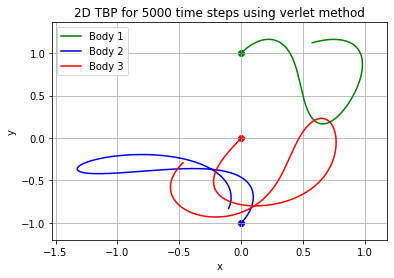

In [ ]:
x1 = 0
y1 = 1
x2 = -x1 
y2 = -y1  
x3 = 0
y3 = 0 

vx1 =  0.3471; 
vy1 =  0.5327;  
vx2 = vx1; 
vy2 = vy1;
vx3 = -2*vx1 
vy3 = -2*vy1 

x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

plot(x,y)

These functions are used to define the starting positions and velocities of the bodies. The velocities are random 2D vectors with numbers between -0.5 and 0.5. The positions are visualized in the next cell

In [6]:
def get_random_position(sector):
    theta = np.random.uniform(2*sector*math.pi/3,2*(sector+1)*math.pi/3)
    r = np.random.uniform(1.5,2)
    return math.cos(theta)*r, math.sin(theta)*r

def get_random_velocities():
    return_array = []
    for i in range(6):
        return_array.append(np.random.uniform(-0.5,0.5))
    return return_array
    

This is a visualization of the distribution of the starting positions of the three bodies. Every body's starting location is in its own colored region of the plot shown below

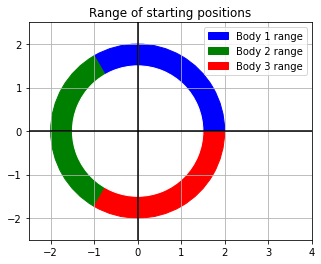

In [ ]:
fig, ax = plt.subplots(1) 

ax.grid(True)
plt.axhline(linewidth=1.5, color='black')
plt.axvline(linewidth=1.5, color='black')

ax.add_artist(mpatches.Wedge((0,0), 2, 0, 120, fc='blue', edgecolor='blue'))
ax.add_artist(mpatches.Wedge((0,0), 2, 120, 240, fc='green', edgecolor='green'))
ax.add_artist(mpatches.Wedge((0,0), 2, 240, 360, fc='red', edgecolor='red'))
ax.add_artist(mpatches.Wedge((0,0), 1.5, 0, 360, fc='white', edgecolor = 'white'))

ax.set_xlim(-2.5, 4)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect(1)

plt.title('Range of starting positions') 
ax.legend(handles=[mpatches.Patch(color='blue', label='Body 1 range'), mpatches.Patch(color='green', label='Body 2 range'), mpatches.Patch(color='red', label='Body 3 range')])

plt.savefig("init-restrictions.png")
plt.show() 

This cell calculates the energy of the system

In [ ]:
def get_kinetic_energy(mass, v1, v2):
    velocity = np.sqrt(v1*v1 + v2*v2)
    return mass*velocity*velocity/2

def get_potential_energy(x1, y1, m1, x2, y2, m2, G):
    distance = np.sqrt((y2-y1)*(y2-y1) + (x2-x1)*(x2-x1))
    return G*m1*m2/distance

def get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G):
    total_kinetic =  get_kinetic_energy(M[0],vx1,vy1) + get_kinetic_energy(M[1],vx2,vy2) + get_kinetic_energy(M[2],vx3,vy3)
    total_potential = get_potential_energy(x1,y1,M[0],x2,y2,M[1],G) + get_potential_energy(x1,y1,M[0],x3,y3,M[2],G) + get_potential_energy(x2,y2,M[1],x3,y3,M[2],G)
    return total_kinetic - total_potential


This initializes the positions and velocities

In [ ]:
x1,y1 = get_random_position(0)
x2,y2 = get_random_position(1)
x3,y3 = get_random_position(2)

vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

This cell runs the verlet method

In [ ]:
x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

This cell plots the results


Positions:
Body 1: 1.3141206544481148, 0.7476298930596988
Body 2: -1.642596233624362, 0.45717424622418007
Body 3: 0.3946366495762155, -1.5719972960896902

Velocities:
Body 1: 0.25106849079308735, 0.2230782388455652
Body 2: 0.48467576039076254, -0.43519616353660473
Body 3: 0.4959988059248257, -0.44006128691413315



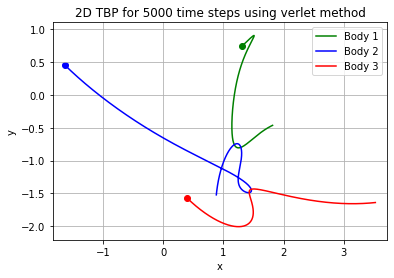

In [ ]:
print("\nPositions:")
print("Body 1: " + str(x1) + ", " + str(y1))
print("Body 2: " + str(x2) + ", " + str(y2))
print("Body 3: " + str(x3) + ", " + str(y3) + "\n")

print("Velocities:")
print("Body 1: " + str(vx1) + ", " + str(vy1))
print("Body 2: " + str(vx2) + ", " + str(vy2))
print("Body 3: " + str(vx3) + ", " + str(vy3) + "\n")

#print("Total energy of the system: " + str(get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G)))
#print("Trajectories approved: " + str(check(x,y)))
plot(x,y)

This cell checks if some of the bodies went too far out. We discard such cases mainly because we need small values for our training data

In [ ]:
def check(x,y):
    threshold = 6
    if np.amax(x) > threshold or np.amin(x) < -threshold or np.amax(y) > threshold or np.amin(y) <- threshold:
        return False
    return True


This cell initializes 12 empty dataframes, each one representing one of our variables

In [ ]:
df_x1 = pd.DataFrame()
df_x2 = pd.DataFrame()
df_x3 = pd.DataFrame()

df_y1 = pd.DataFrame()
df_y2 = pd.DataFrame()
df_y3 = pd.DataFrame()

df_vx1 = pd.DataFrame()
df_vx2 = pd.DataFrame()
df_vx3 = pd.DataFrame()

df_vy1 = pd.DataFrame()
df_vy2 = pd.DataFrame()
df_vy3 = pd.DataFrame()

This cell runs 5000 simulations and adds them to the dataframes. The values are saved in the following format: the rows represent the time steps and the columns represent the different simulations

In [ ]:
sample_size = 5000
counter = 0
i=0
while i < sample_size:
    counter += 1

    x1,y1 = get_random_position(0)
    x2,y2 = get_random_position(1)
    x3,y3 = get_random_position(2)

    vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()
    
    x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)


    if check(x,y):

        df_x1[str(i)] = x[:,0]
        df_x2[str(i)] = x[:,1]
        df_x3[str(i)] = x[:,2]

        df_y1[str(i)] = y[:,0]
        df_y2[str(i)] = y[:,1]
        df_y3[str(i)] = y[:,2]

        df_vx1[str(i)] = vx[:,0]
        df_vx2[str(i)] = vx[:,1]
        df_vx3[str(i)] = vx[:,2]

        df_vy1[str(i)] = vy[:,0]
        df_vy2[str(i)] = vy[:,1]
        df_vy3[str(i)] = vy[:,2]

        i += 1

print("Done, accuracy = " + str(1000 / counter))

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This cell saves the dataframes into csv files in the folder "data"

In [ ]:
df_x1.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/x1.csv')
df_x2.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/x2.csv')
df_x3.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/x3.csv')
df_y1.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/y1.csv')
df_y2.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/y2.csv')
df_y3.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/y3.csv')
df_vx1.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx1.csv')
df_vx2.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx2.csv')
df_vx3.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx3.csv')
df_vy1.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy1.csv')
df_vy2.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy2.csv')
df_vy3.to_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy3.csv')

#Training data

In [ ]:
x1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/x1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/x2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/x3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

y1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/y1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/y2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/y3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

vx1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vx2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vx3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vx3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

vy1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vy2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vy3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_all/vy3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

In [ ]:
x1.shape

(5000, 5000)

In [ ]:
x=np.array([x1[:,4342], x2[:,4342], x3[:,4342]]).transpose()

In [ ]:
y=np.array([y1[:,4342], y2[:,4342], y3[:,4342]]).transpose()

In [ ]:
fast_trajectories = []
threshold = 8
for i in range(5000):
    simulated_velocities = np.array([vx1[:,i], vx2[:,i], vx3[:,i], vy1[:,i], vy2[:,i], vy3[:,i]])
    if np.amax(simulated_velocities) > threshold or np.amin(simulated_velocities) < -threshold:
        fast_trajectories.append(i)

In [ ]:
"""
def trim_simulation(index):
    i=0
    while i < 5000:
        if vx1[i][index] > threshold or vx2[i][index] > threshold or vx3[i][index] > threshold or vy1[i][index] > threshold or vy2[i][index] > threshold or vy3[i][index] > threshold:
            break
        if vx1[i][index] < -threshold or vx2[i][index] < -threshold or vx3[i][index] < -threshold or vy1[i][index] < -threshold or vy2[i][index] < -threshold or vy3[i][index] < -threshold:
            break
        i+=1
    np.delete(x1, [[i:][index]])
    np.delete(x2, [[i:][index]])
    np.delete(x3, [[i:][index]])

    np.delete(y1, [[i:][index]])
    np.delete(y2, [[i:][index]])
    np.delete(y3, [[i:][index]])

    np.delete(vx1, [[i:][index]])
    np.delete(vx2, [[i:][index]])
    np.delete(vx3, [[i:][index]])

    np.delete(vy1, [[i:][index]])
    np.delete(vy2, [[i:][index]])
    np.delete(vy3, [[i:][index]])
"""
    

In [ ]:
fast_trajectories = np.sort(fast_trajectories)[::-1]

In [ ]:

for i in fast_trajectories:
    x1 = np.delete(x1, i, 1)
    x2 = np.delete(x2, i, 1)
    x3 = np.delete(x3, i, 1)
    
    y1 = np.delete(y1, i, 1)
    y2 = np.delete(y2, i, 1)
    y3 = np.delete(y3, i, 1)
    
    vx1 = np.delete(vx1, i, 1)
    vx2 = np.delete(vx2, i, 1)
    vx3 = np.delete(vx3, i, 1)

    vy1 = np.delete(vy1, i, 1)
    vy2 = np.delete(vy2, i, 1)
    vy3 = np.delete(vy3, i, 1)

In [ ]:
pd.DataFrame(x1).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x1.csv')
pd.DataFrame(x2).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x2.csv')
pd.DataFrame(x3).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x3.csv')
pd.DataFrame(y1).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y1.csv')
pd.DataFrame(y2).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y2.csv')
pd.DataFrame(y3).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y3.csv')
pd.DataFrame(vx1).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx1.csv')
pd.DataFrame(vx2).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx2.csv')
pd.DataFrame(vx3).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx3.csv')
pd.DataFrame(vy1).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy1.csv')
pd.DataFrame(vy2).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy2.csv')
pd.DataFrame(vy3).to_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy3.csv')

NameError: ignored

In [ ]:
x1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

y1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/y3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

vx1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vx2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vx3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vx3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

vy1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vy2 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy2.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
vy3 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/vy3.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

In [ ]:
x1 = pd.read_csv(r'/content/drive/MyDrive/NNs_data/data_trimmed/x1.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x1.shape

(5000, 4467)

In [ ]:
x_train = np.zeros(shape=(4000*10,12), dtype='f')
y_train = np.zeros(shape=(4000*10,12), dtype='f')

x_test = np.zeros(shape=(467*10,12), dtype='f')
y_test = np.zeros(shape=(467*10,12), dtype='f')

In [ ]:
indeces = np.array(np.arange(4467))
np.random.shuffle(indeces)

In [ ]:
def get_values(i, index):
    return np.array([[
                     x1[i][index],
                     x2[i][index],
                     x3[i][index],

                     y1[i][index],
                     y2[i][index],
                     y3[i][index],
                      
                     vx1[i][index],
                     vx2[i][index],
                     vx3[i][index],
                      
                     vy1[i][index],
                     vy2[i][index],
                     vy3[i][index],
    ]], dtype='f')

In [ ]:
count = 0
index = 0
while index < 467:
    for i in range(10):
        x_test[count,:] = get_values(i*500, indeces[index])[0,:]
        y_test[count,:] = get_values(i*500 + 1, indeces[index])[0,:]
        count+=1
    index += 1

In [ ]:
count = 0
while index < len(indeces[467:]):
    for i in range(10):
        x_train[count,:] = get_values(i*500, indeces[index])[0,:]
        y_train[count,:] = get_values(i*500 + 1, indeces[index])[0,:]
        count+=1
    index += 1

In [ ]:
x_train.shape

(40000, 12)

In [ ]:
x_test.shape

(4670, 12)

In [ ]:
pd.DataFrame(x_train).to_csv(r'/content/drive/MyDrive/NNs_data/x_train.csv')
pd.DataFrame(y_train).to_csv(r'/content/drive/MyDrive/NNs_data/y_train.csv')

pd.DataFrame(x_test).to_csv(r'/content/drive/MyDrive/NNs_data/x_test.csv')
pd.DataFrame(y_test).to_csv(r'/content/drive/MyDrive/NNs_data/y_test.csv')

#Building the model

In [8]:
import tensorflow as tf

In [9]:
x_train = pd.read_csv(r'/content/drive/MyDrive/NNs_data/x_train.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y_train = pd.read_csv(r'/content/drive/MyDrive/NNs_data/y_train.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
x_test = pd.read_csv(r'/content/drive/MyDrive/NNs_data/x_test.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')
y_test = pd.read_csv(r'/content/drive/MyDrive/NNs_data/y_test.csv').set_index('Unnamed: 0').to_numpy(dtype = 'f')

In [10]:
x_train, x_test = x_train / 8, x_test / 8

In [11]:
np.amin(x_train)

-0.80103445

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(12,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(12),
])

In [39]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer='adam',
    metrics=['accuracy'],
)

In [40]:
model.fit(x_train, y_train, epochs=12, batch_size=1000)

Epoch 1/12
40/40 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.2779
Epoch 2/12
40/40 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.3963
Epoch 3/12
40/40 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.5569
Epoch 4/12
40/40 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.6796
Epoch 5/12
40/40 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.7327
Epoch 6/12
40/40 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.8071
Epoch 7/12
40/40 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.8753
Epoch 8/12
40/40 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9176
Epoch 9/12
40/40 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9402
Epoch 10/12
40/40 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9489
Epoch 11/12
40/40 [

In [41]:
model.evaluate(x_test,  y_test, verbose=2)

146/146 - 0s - loss: 0.0092 - accuracy: 0.9493 - 308ms/epoch - 2ms/step


[0.009190798737108707, 0.9492505192756653]

In [68]:
x1,y1 = get_random_position(0)
x2,y2 = get_random_position(1)
x3,y3 = get_random_position(2)

vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

dat = np.array([[x1,x2,x3,y1,y2,y3,vx1,vx2,vx3,vy1,vy2,vy3]], dtype = 'f')

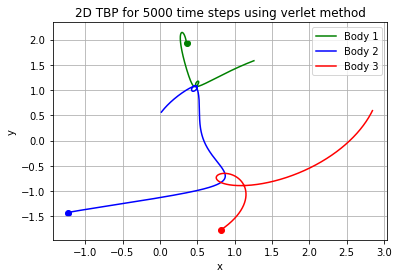

In [69]:
x,y,vx,vy = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)
plot(x,y)

In [70]:
dat_to_predict = dat

In [71]:
x_model = np.array([[0 for x in range(3)] for y in range(5000)], dtype='f')
y_model = np.array([[0 for x in range(3)] for y in range(5000)], dtype='f')

vx_model = np.array([[0 for x in range(3)] for y in range(5000)], dtype='f')
vy_model = np.array([[0 for x in range(3)] for y in range(5000)], dtype='f')

In [72]:
for i in range(5000):
    dat_to_predict/=8
    dat_to_predict = model.predict(dat_to_predict)

    x_model[i][0] = dat_to_predict[0][0]
    x_model[i][1] = dat_to_predict[0][1]
    x_model[i][2] = dat_to_predict[0][2]

    y_model[i][0] = dat_to_predict[0][3]
    y_model[i][1] = dat_to_predict[0][4]
    y_model[i][2] = dat_to_predict[0][5]

    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


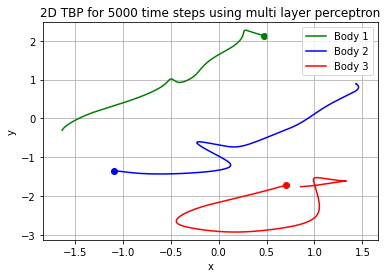

In [76]:
plot(x_model, y_model)

In [57]:
model.predict(dat_to_predict)

array([[ 1.2500112 , -0.27556837,  2.8070827 ,  6.5421686 ,  2.7253714 ,
         1.9327165 , -3.854568  ,  4.552267  ,  2.7107782 ,  7.9707017 ,
        -4.4104395 , -0.96784735]], dtype=float32)